In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# import os
# os.chdir('C:/Users/deeks/Downloads/predice-el-futuro')

In [3]:
train = pd.read_csv('train_csv.csv')

In [4]:
train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [5]:
train.shape

(80, 3)

In [6]:
train['time'] = pd.DatetimeIndex(train['time']).time
train=train.set_index(['time'])

In [7]:
train = train.drop(['id'],axis = 1)
train.head()

,feature
time,
00:00:00,237.97
00:00:10,57.93
00:00:20,90.53
00:00:30,260.75
00:00:40,49.70


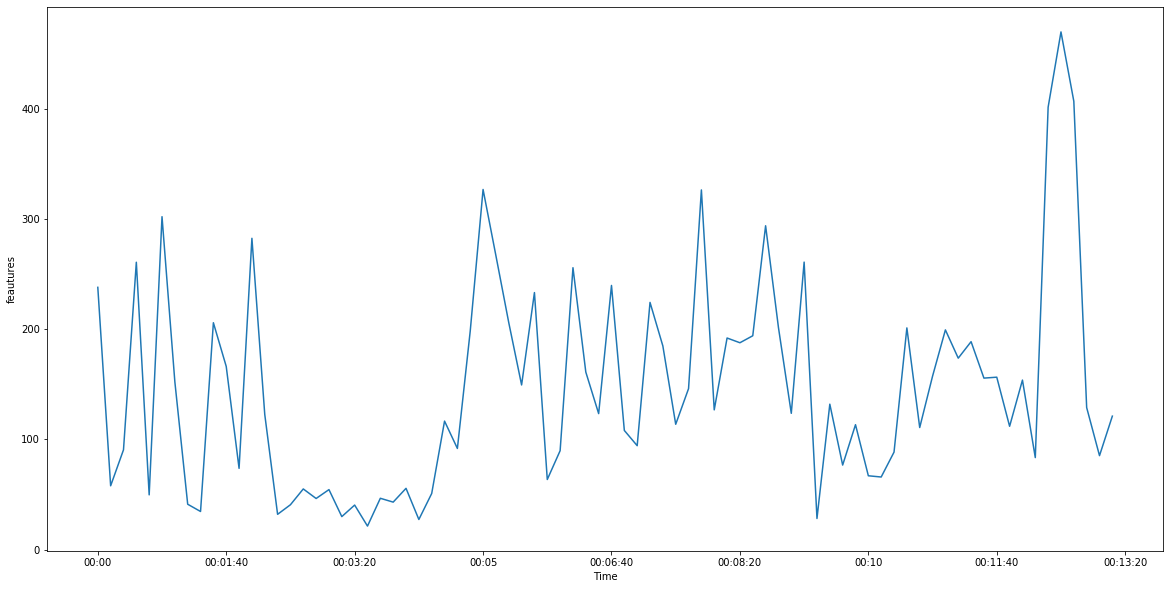

In [8]:
plt.figure(figsize=(20,10))
plt.xlabel("Time")
plt.ylabel("feautures")
plt.plot(train["feature"])

In [9]:
rolmean=train.rolling(60).mean()
rolstd=train.rolling(60).std()


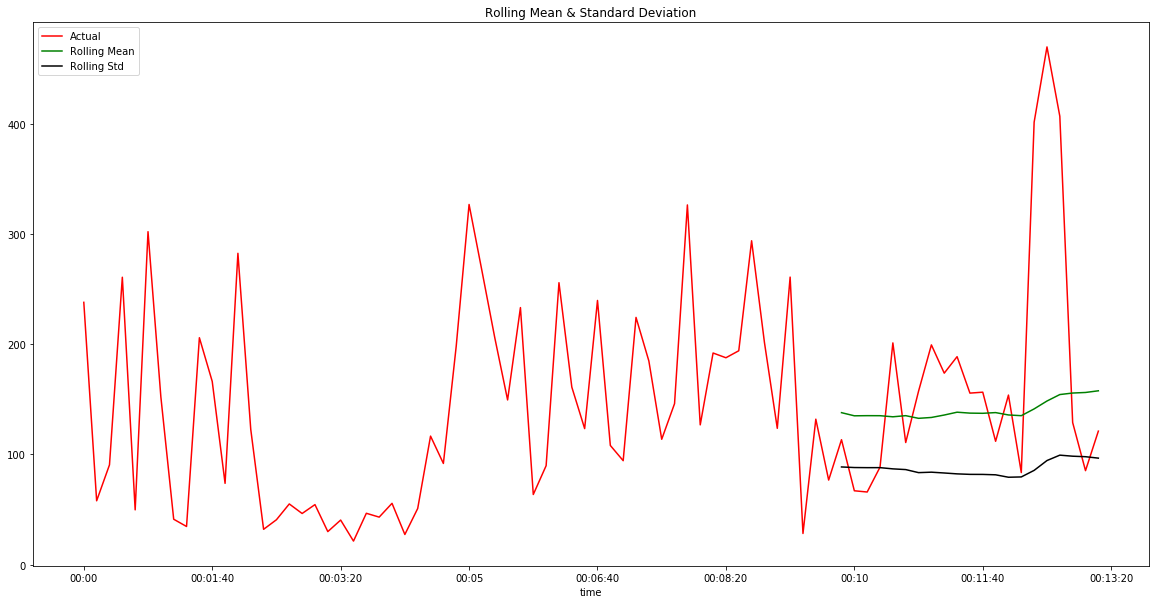

In [10]:
plt.figure(figsize=(20,10))
actual=plt.plot(train, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [11]:
#Creating function for ploting stationarity

from statsmodels.tsa.stattools import adfuller
   
def test_stationarity(train, window = 12, cutoff = 0.01):
   #Determing rolling statistics
    rolmean = train.rolling(window).mean()
    rolstd = train.rolling(window).std()

   #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(train, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
   
   #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(train, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
   
    print(dfoutput)

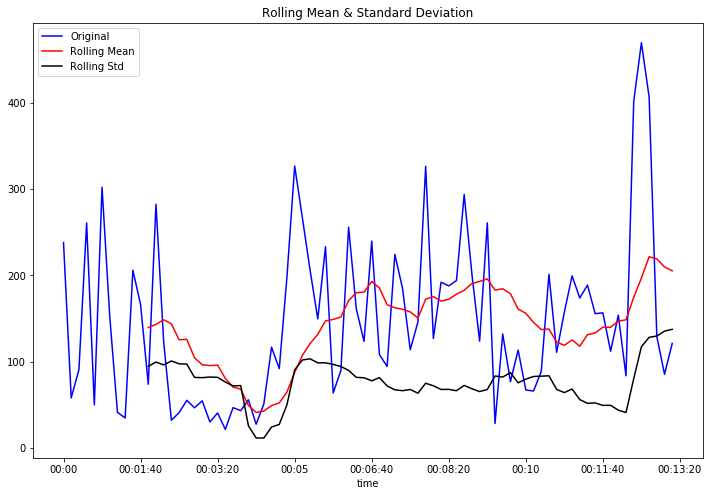

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.945866e+00
p-value                        2.205049e-07
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


In [12]:
test_stationarity(train['feature'])

### hear the data is stationary so there is no need of doing the Differentiate of data to get into the data stationary

<Figure size 432x288 with 0 Axes>

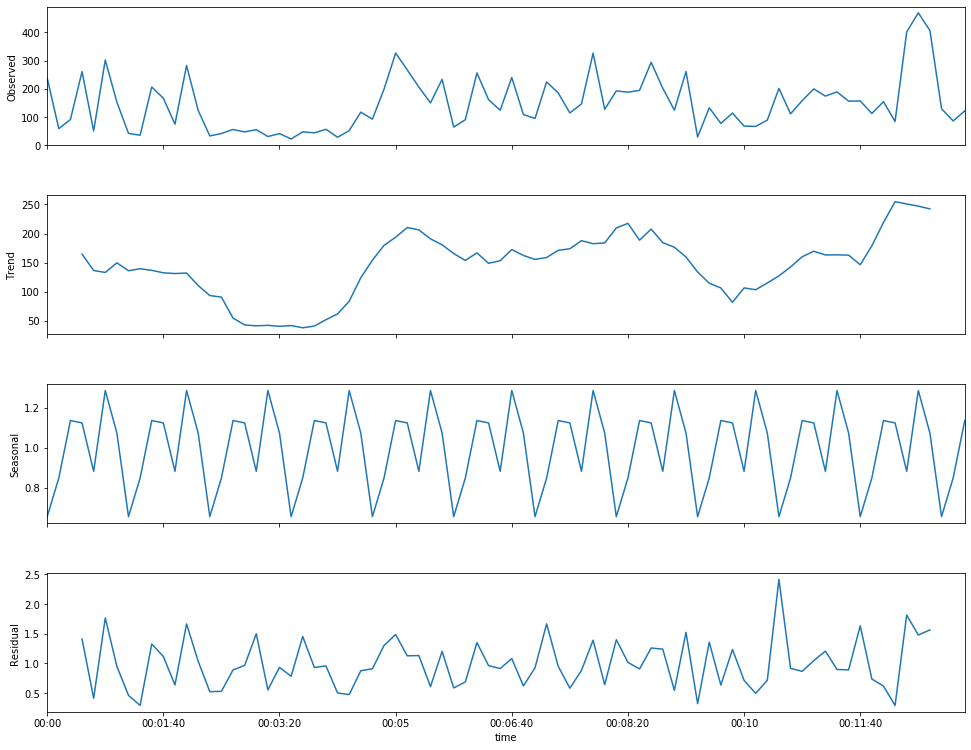

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
result = seasonal_decompose(train['feature'], model = 'multiplicative', freq=7)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

Text(0.5, 1.0, 'Autocorrelation Function')

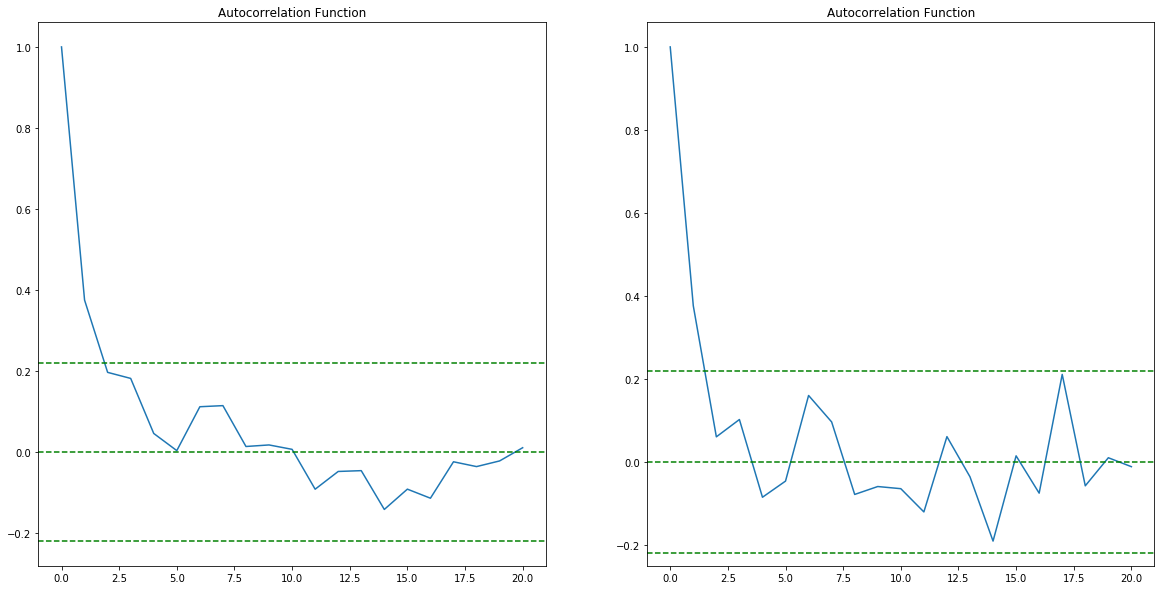

In [14]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(train.feature, nlags=20)
lag_pacf=pacf(train.feature, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(train.feature)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(train.feature)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(train.feature)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(train.feature)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

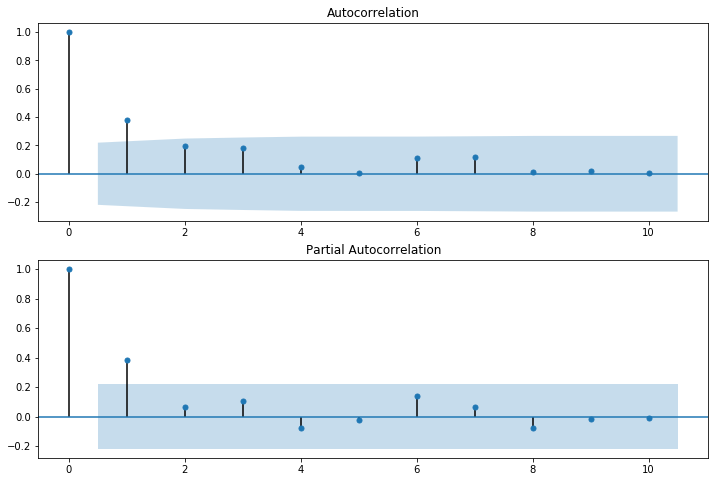

In [15]:
import statsmodels.api as sm

#Plotting ACF, PACF plot  - Original data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train.feature, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train.feature, lags=10, ax=ax2)

## Model1

In [16]:
# arima_model = sm.tsa.ARIMA(train.feature, (5,0,3)).fit(disp=False)
# print(arima_model.summary())

In [17]:
# start_index = 39
# end_index = 79
# train['forecast_Ar'] = arima_model.predict(start = start_index, end= end_index, dynamic= True)  
# train[start_index:end_index][['feature', 'forecast_Ar']].plot(figsize=(12, 8))

In [18]:
test = pd.read_csv("test_csv.csv")

In [19]:
# start_index = 80
# end_index = 119

In [20]:
# Arima_forecast = arima_model.forecast(40)

In [21]:
# Arima_forecast

In [22]:
# # ar = [97.82517421, 108.05478535, 133.19941227, 138.81494695,
#         142.90799109, 148.48550203, 149.03122103, 148.28916486,
#         148.23848223, 147.65980058, 147.02658954, 146.80261056,
#         146.6635894 , 146.56344644, 146.56763964, 146.59496723,
#         146.61230621, 146.63425025, 146.65117911, 146.65810494,


#         146.6615152 , 146.66283189, 146.66202941, 146.66089954,
#         146.66005723, 146.6593416 , 146.65889473, 146.65871873,
#         146.6586608 , 146.65866708, 146.65871173, 146.65875516,
#         146.65878602, 146.65880707, 146.65881801, 146.65882145,
#         146.6588215 , 146.65882006, 146.65881817, 146.65881665]

In [23]:
# ar=pd.DataFrame(ar)

In [24]:
# ar.to_csv("arima_model.csv",index=False)

In [25]:
# arima = pd.read_csv("arima_model.csv")
# arima.head()

In [26]:
# a = arima['0']

test.head()

In [27]:
# new_df = pd.DataFrame(zip(test['id'],a),columns=['id','feature'])
# new_df.to_csv("new_sub.csv",index=False)
# new_df.shape

## Model2

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


fit1 = ExponentialSmoothing((train['feature']) ,seasonal_periods=6 ,trend='add', seasonal='add',).fit()
print(fit1.summary())

C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   80
Model:             ExponentialSmoothing   SSE                         680791.540
Optimized:                         True   AIC                            743.919
Trend:                         Additive   BIC                            767.739
Seasonal:                      Additive   AICC                           748.576
Seasonal Periods:                     6   Date:                 Thu, 30 Apr 2020
Box-Cox:                          False   Time:                         18:21:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2464736                alpha                 True
smoothing_slope          

C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


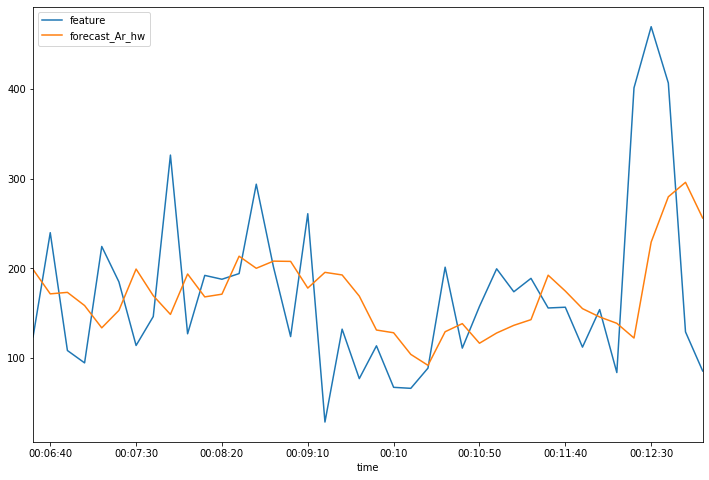

In [29]:
start_index = 39
end_index = 79
train['forecast_Ar_hw'] = fit1.predict(start = start_index, end= end_index)  
train[start_index:end_index][['feature', 'forecast_Ar_hw']].plot(figsize=(12, 8))

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [30]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print(rmse)

<function rmse at 0x000002490B032950>


In [31]:
rmse(train[39:79]['feature'],train[39:79]['forecast_Ar_hw'])

96.62203085665176

In [32]:
train[39:79]

,feature,forecast_Ar_hw
time,,
00:06:30,123.41,198.626067
00:06:40,239.69,171.387094
00:06:50,108.12,173.053135
00:07:00,94.31,158.342438
00:07:10,224.30,133.440814
00:07:20,184.75,152.946395
00:07:30,113.74,199.072770
00:07:40,146.06,169.340297
00:07:50,326.35,148.433500


In [33]:
holt_forecast = fit1.forecast(40)

C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [34]:
holt_forecast = holt_forecast.values.tolist()
holt_forecast = pd.DataFrame(holt_forecast)

In [35]:
holt_forecast.to_csv("arima_model_holt.csv",index=False)

In [36]:
arima = pd.read_csv("arima_model_holt.csv")
arima.head()

,0
0,181.316505
1,219.604132
2,210.903932
3,195.735112
4,197.028716


In [37]:
a = arima['0']
new_df = pd.DataFrame(zip(test['id'],a),columns=['id','feature'])
new_df.to_csv("new_sub_1.csv",index=False)
new_df.shape

(40, 2)

## Model 3

In [38]:
model = ExponentialSmoothing(train.feature, trend=None, seasonal="add", seasonal_periods=6, damped=False)
model2 = ExponentialSmoothing(train.feature, trend="add", seasonal="add", seasonal_periods=6, damped=False)
model3 = ExponentialSmoothing(train.feature, trend='add', seasonal="multiplicative", seasonal_periods=6, damped=False)
fit = model.fit()
pred = fit.forecast(30)
fit2 = model2.fit()
pred2 = fit2.forecast(30)
fit3 = model3.fit()
pred3 = fit3.forecast(30)

C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimiz

In [39]:
print(fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   80
Model:             ExponentialSmoothing   SSE                         681087.138
Optimized:                         True   AIC                            739.954
Trend:                             None   BIC                            759.010
Seasonal:                      Additive   AICC                           743.142
Seasonal Periods:                     6   Date:                 Thu, 30 Apr 2020
Box-Cox:                          False   Time:                         18:21:35
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2535298                alpha                 True
smoothing_seasonal       

In [40]:
val = train[50:]

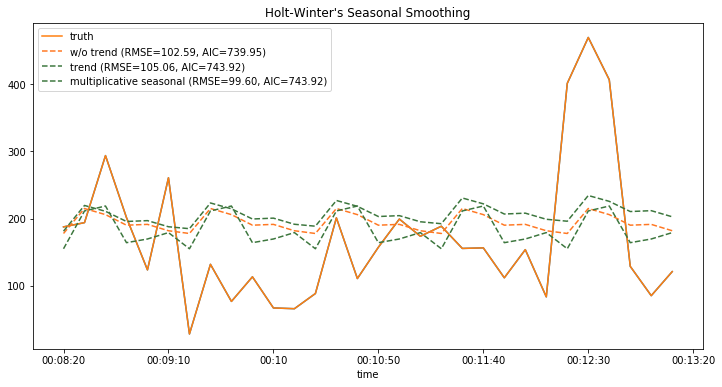

In [41]:
sse1 = np.sqrt(np.mean(np.square(val['feature'].values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(val['feature'].values - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(val['feature'].values - pred3.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[50:], train['feature'].values[50:]);
ax.plot(val.index, val['feature'].values, label='truth');
ax.plot(val.index, pred, linestyle='--', color='#ff7823', label="w/o trend (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
ax.plot(val.index, pred2, linestyle='--', color='#3c763d', label="trend (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.plot(val.index, pred3, linestyle='--', color='#3c763d', label="multiplicative seasonal (RMSE={:0.2f}, AIC={:0.2f})".format(sse3, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

In [42]:
pred_f = fit.forecast(40)

C:\Users\srich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [43]:
pred_f = pred_f.values.tolist()
pred_f = pd.DataFrame(pred_f)

In [44]:
pred_f.to_csv("arima_model_es.csv",index=False)

In [45]:
arima = pd.read_csv("arima_model_es.csv")
arima.head()

,0
0,177.875777
1,215.062612
2,205.968429
3,190.236996
4,191.438164


In [46]:
a = arima['0']
new_df = pd.DataFrame(zip(test['id'],a),columns=['id','feature'])
new_df.to_csv("new_sub_2.csv",index=False)
new_df.shape

(40, 2)